#  [Cleaning US Census Data](https://www.codecademy.com/courses/practical-data-cleaning/projects/data-cleaning-us-census)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#  glob is part of the Standard Library in Python so do not need to install...
import glob   # 2. 

In [2]:
# ------- Inspect the Data! -------
# 2.:
files = glob.glob("states*.csv")
us_census_list = [pd.read_csv(filename) for filename in files]

us_census = pd.concat(us_census_list)

us_census.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 5
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  60 non-null     int64 
 1   State       60 non-null     object
 2   TotalPop    60 non-null     int64 
 3   Hispanic    60 non-null     object
 4   White       60 non-null     object
 5   Black       60 non-null     object
 6   Native      60 non-null     object
 7   Asian       60 non-null     object
 8   Pacific     55 non-null     object
 9   Income      60 non-null     object
 10  GenderPop   60 non-null     object
dtypes: int64(2), object(9)
memory usage: 5.6+ KB


In [3]:
us_census.describe()

,Unnamed: 0,TotalPop
count,60.000000,6.000000e+01
mean,2.500000,6.238516e+06
std,1.722237,6.588488e+06
min,0.000000,6.266040e+05
25%,1.000000,2.030429e+06
50%,2.500000,4.701414e+06
75%,4.000000,7.303256e+06
max,5.000000,3.842146e+07


In [4]:
# 3.:
us_census.columns

Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop'],
      dtype='object')

In [5]:
us_census.dtypes

Unnamed: 0     int64
State         object
TotalPop       int64
Hispanic      object
White         object
Black         object
Native        object
Asian         object
Pacific       object
Income        object
GenderPop     object
dtype: object

In [6]:
# 4.:
us_census.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,$43296.35860306644,2341093M_2489527F
1,1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,$70354.74390243902,384160M_349215F
2,2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,$54207.82095490716,3299088M_3342840F
3,3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,$41935.63396778917,1451913M_1506295F
4,4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,$67264.78230266465,19087135M_19334329F


In [7]:
# ------- Regex to the Rescue -------
# 5. Splitting by Index:
us_census.Income = pd.to_numeric(us_census.Income.str[1:])
us_census.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,43296.358603,2341093M_2489527F
1,1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,70354.743902,384160M_349215F
2,2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,54207.820955,3299088M_3342840F
3,3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,41935.633968,1451913M_1506295F
4,4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,67264.782303,19087135M_19334329F


In [8]:
us_census.dtypes

Unnamed: 0      int64
State          object
TotalPop        int64
Hispanic       object
White          object
Black          object
Native         object
Asian          object
Pacific        object
Income        float64
GenderPop      object
dtype: object

In [9]:
# 6-7. Splitting by Character:
genders = us_census.GenderPop.str.split("_")
genders
us_census["Men"] = pd.to_numeric(genders.str.get(0).str[:-1])
us_census["Women"] = pd.to_numeric(genders.str.get(1).str[:-1])
#print(us_census.head())
#print(us_census.dtypes)

In [10]:
us_census["Men"] = pd.to_numeric(genders.str.get(0).str[:-1])
us_census["Women"] = pd.to_numeric(genders.str.get(1).str[:-1])
us_census.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Men,Women
0,0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,43296.358603,2341093M_2489527F,2341093,2489527.0
1,1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,70354.743902,384160M_349215F,384160,349215.0
2,2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,54207.820955,3299088M_3342840F,3299088,3342840.0
3,3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,41935.633968,1451913M_1506295F,1451913,1506295.0
4,4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,67264.782303,19087135M_19334329F,19087135,19334329.0


In [11]:
us_census.dtypes

Unnamed: 0      int64
State          object
TotalPop        int64
Hispanic       object
White          object
Black          object
Native         object
Asian          object
Pacific        object
Income        float64
GenderPop      object
Men             int64
Women         float64
dtype: object

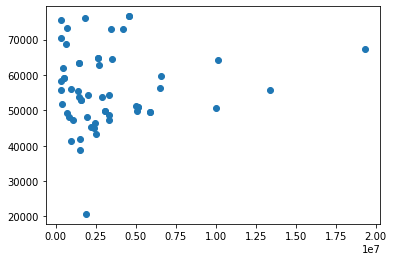

<Figure size 432x288 with 0 Axes>

In [12]:
# 8.:
plt.scatter(us_census.Women, us_census.Income)
plt.show()
plt.clf()

In [13]:
# 9. Fill the missing values:
us_census = us_census.fillna(
  value = {
    "Women": us_census.TotalPop - us_census.Men
  }
)
us_census.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Men,Women
0,0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,43296.358603,2341093M_2489527F,2341093,2489527.0
1,1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,70354.743902,384160M_349215F,384160,349215.0
2,2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,54207.820955,3299088M_3342840F,3299088,3342840.0
3,3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,41935.633968,1451913M_1506295F,1451913,1506295.0
4,4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,67264.782303,19087135M_19334329F,19087135,19334329.0


In [14]:
us_census[["State", "Women"]].head()

,State,Women
0,Alabama,2489527.0
1,Alaska,349215.0
2,Arizona,3342840.0
3,Arkansas,1506295.0
4,California,19334329.0


In [15]:
# 10-11. Dealing with Duplicates:
us_census.head(20)

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Men,Women
0,0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,43296.358603,2341093M_2489527F,2341093,2489527.0
1,1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,70354.743902,384160M_349215F,384160,349215.0
2,2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,54207.820955,3299088M_3342840F,3299088,3342840.0
3,3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,41935.633968,1451913M_1506295F,1451913,1506295.0
4,4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,67264.782303,19087135M_19334329F,19087135,19334329.0
5,5,Colorado,5278906,20.78438003220608%,69.89557165861504%,3.546376811594201%,0.5738325281803548%,2.661996779388082%,NaN,64657.801787,2648667M_2630239F,2648667,2630239.0
0,0,Colorado,5278906,20.78438003220608%,69.89557165861504%,3.546376811594201%,0.5738325281803548%,2.661996779388082%,NaN,64657.801787,2648667M_2630239F,2648667,2630239.0
1,1,Connecticut,3593222,15.604830917874388%,67.6770531400966%,10.34806763285027%,0.12620772946859898%,4.021980676328502%,0.018599033816425123%,76146.560588,1751607M_1841615F,1751607,1841615.0
2,2,Delaware,926454,8.82476635514019%,64.63271028037383%,20.743925233644834%,0.25981308411214965%,3.2686915887850483%,NaN,61827.976636,448413M_478041F,448413,478041.0
3,3,District of Columbia,647484,9.165921787709499%,33.103910614525134%,51.77653631284915%,0.20055865921787713%,3.3832402234636865%,0.029608938547486034%,75466.363636,306674M_340810F,306674,340810.0


In [16]:
us_census.duplicated().sum()


0

In [17]:
us_census = us_census.drop(columns = ["Unnamed: 0"])
us_census.duplicated().sum()

9

In [18]:
us_census = us_census.drop_duplicates().reset_index(drop = True)

In [19]:
us_census.duplicated().sum()

0

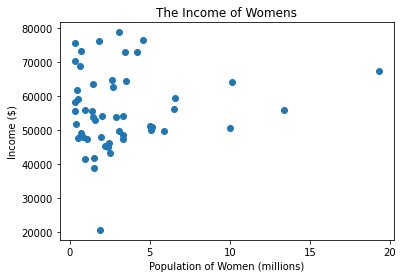

<Figure size 432x288 with 0 Axes>

In [20]:
# 12.:
plt.scatter(us_census.Women, us_census.Income)
plt.title("The Income of Womens")
plt.xlabel("Population of Women (millions)")
plt.ylabel("Income ($)")
x = [0, 5 * 10**6,10 * 10**6, 15 * 10**6, 20 * 10**6]
labels = [0, 5, 10, 15, 20]
plt.xticks(x, labels)
plt.show()
plt.clf()

<ipython-input-21-0609a00ccfdd>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  races[column] = pd.to_numeric(races[column].str[:-1])


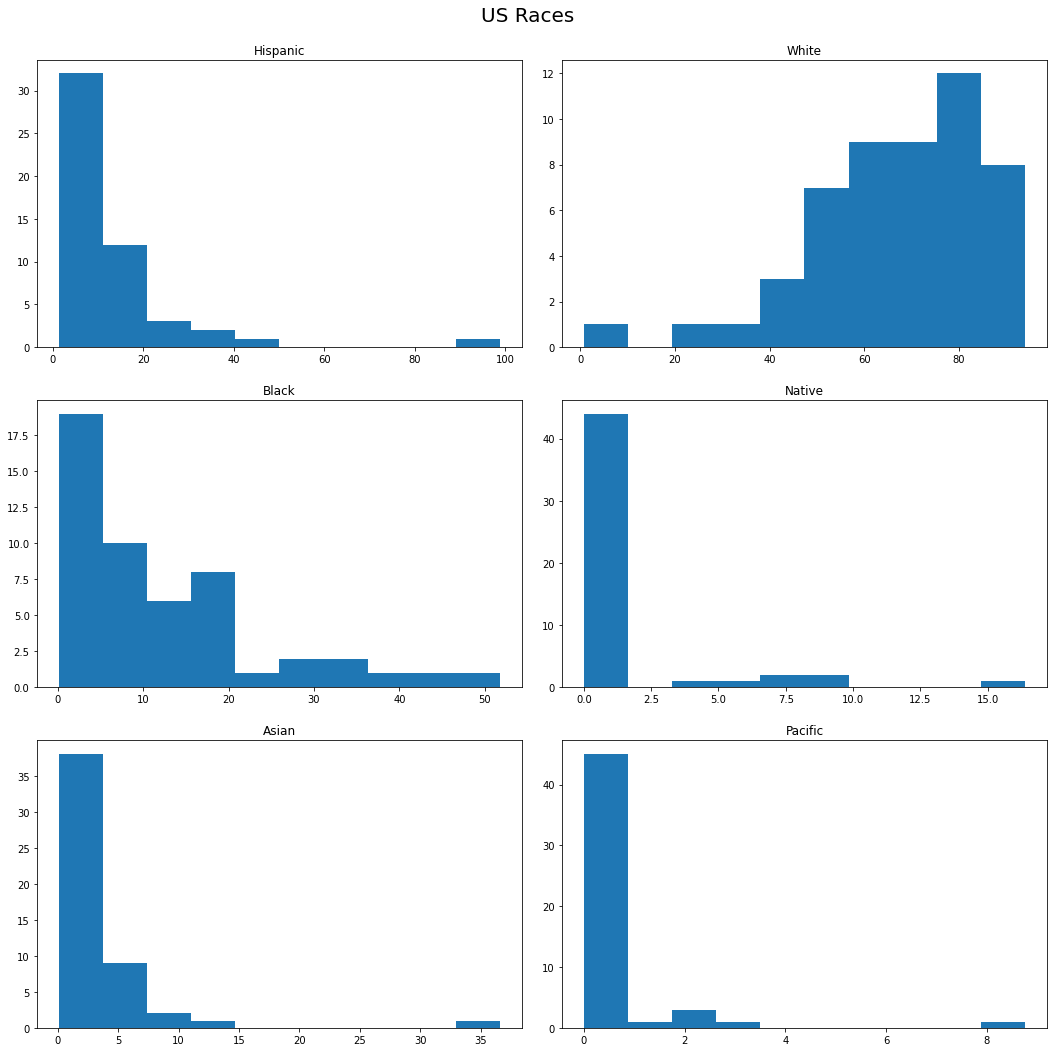

<Figure size 432x288 with 0 Axes>

In [21]:
# 13.:
race_types = [
  "Hispanic",
  "White",
  "Black",
  "Native",
  "Asian",
  "Pacific"
]
races = us_census[race_types]
# Remove '%' useing Splitting by Index:
for column in races.columns:
  races[column] = pd.to_numeric(races[column].str[:-1])

# Fill the missing values:
races = races.fillna(
  value = {
    "Pacific": 100 - races.Hispanic - races.White - races.Black - races.Native - races.Asian
  }
)
plt.figure(figsize = [15, 15])
for index, race in enumerate(races.columns):
  ax = plt.subplot(3, 2, index + 1)
  plt.hist(races[race])
  plt.title(race)

plt.suptitle("US Races", fontsize = 20)
plt.tight_layout(
  pad = 2
)
plt.show()
plt.clf()

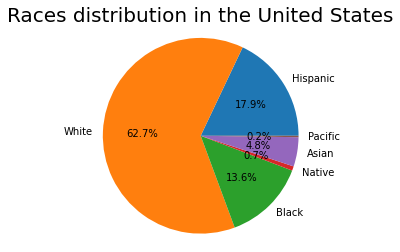

<Figure size 432x288 with 0 Axes>

In [22]:
# 15. US Races:
races["TotalPop"] = us_census.TotalPop
for race in races.columns[:-1]:
  races[f"{race}_pop"] = (races.TotalPop * races[race] / 100).round()


# create barplot for each race:
sum_of_races = [ races[f"{race}_pop"].sum() for race in races if race in race_types]
plt.pie(
  sum_of_races,
  autopct = "%.1f%%",
  labels = race_types
)
plt.axis("equal")
plt.title("Races distribution in the United States", fontsize = 20)
plt.show()
plt.clf()